In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [7]:
df['Touch'] = df['ScreenResolution'].apply( lambda x: 1 if 'Touchscreen' in x else 0).astype(bool)
df['IPS'] = df['ScreenResolution'].apply( lambda x: 1 if 'IPS' in x else 0).astype(bool)

In [8]:
df['ppi'] = (df['ScreenResolution'].str.findall(r'(\b\d+x\d+)').apply(lambda x: x[0].split('x')).apply(lambda x: np.sqrt(int(x[0])**2 + int(x[1])**2))/df['Inches']).round(2)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,IPS,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,141.21
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,220.53
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,226.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,True,True,157.35
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,True,True,276.05
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,False,False,111.94
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False,False,100.45


Can drop ScreenResoulution & Inches

In [9]:
df.drop(columns=['ScreenResolution', 'Inches'], inplace=True)

In [10]:
df['Ram']= df['Ram'].apply(lambda x: x.replace('GB', '')).astype('Int32')
df['Weight'] = df['Weight'].apply(lambda x: x.replace('kg', '')).astype('float32')
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.98
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.68
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.21
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.53
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.98


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   1303 non-null   object 
 1   TypeName  1303 non-null   object 
 2   Cpu       1303 non-null   object 
 3   Ram       1303 non-null   Int32  
 4   Memory    1303 non-null   object 
 5   Gpu       1303 non-null   object 
 6   OpSys     1303 non-null   object 
 7   Weight    1303 non-null   float32
 8   Price     1303 non-null   float64
 9   Touch     1303 non-null   bool   
 10  IPS       1303 non-null   bool   
 11  ppi       1303 non-null   float64
dtypes: Int32(1), bool(2), float32(1), float64(2), object(6)
memory usage: 95.6+ KB


<Axes: >

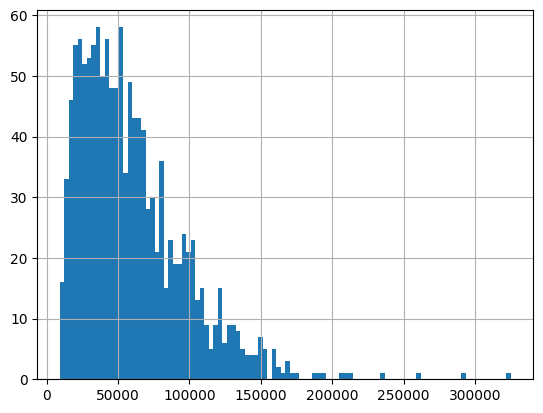

In [12]:
df['Price'].hist(bins=100)

<Axes: ylabel='Company'>

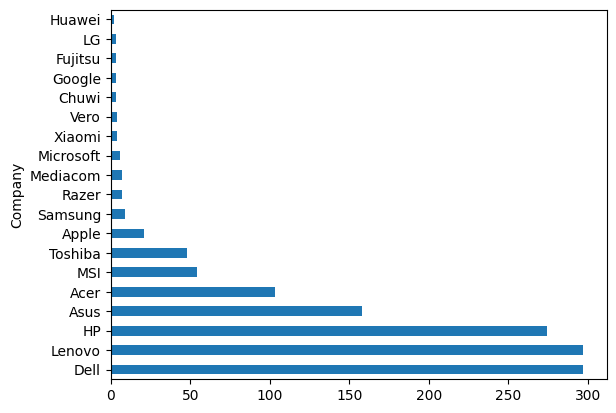

In [13]:
df['Company'].value_counts().plot(kind='barh')

In [14]:
df['CPU Brand'] = df['Cpu'].apply(lambda x: x[:13] if pd.Series(x).str.contains(r'\bi\d').any() else ('AMD' if pd.Series(x).str.contains(r'\bAMD').any() else 'Other Intel Processor'))

In [15]:
df['Clock Speed'] = pd.to_numeric(df['Cpu'].str.findall(r'(\d+\.\d{1,2})|((\d+))GHz').str.get(0).str.get(0), errors='coerce')

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

df['Clock Speed'] = imputer.fit_transform(df[['Clock Speed']])

In [17]:
df.drop(columns=['Cpu'], inplace=True)

In [18]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [19]:
df['Memory'] = df['Memory'].str.replace('.0', '').str.replace('GB', '').apply(lambda x: x.replace('TB', '000') if 'TB' in x else x.replace('GB', ''))

In [20]:
def storage_type(x):
    ssd, hdd, flash, hybrid = None, None, None, None
    z = x.split(' ')
    for i in range(len(z)):
        if 'SSD' in z[i]:
            ssd = z[i-1]
        elif 'HDD' in z[i]:
            hdd = z[i-1]
        elif 'Flash' in z[i]:
            flash = z[i-1]
        elif 'Hybrid' in z[i]:
            hybrid = z[i-1]
    return ssd, hdd, flash, hybrid


In [21]:
df[['ssd','hdd', 'flash', 'hybrid']] = pd.DataFrame(df['Memory'].apply(storage_type).to_list(),index=df.index)

In [22]:
df.replace({None : 0, True:1, False:0}, inplace=True)

C:\Users\prave\AppData\Local\Temp\ipykernel_18924\3280522702.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({None : 0, True:1, False:0}, inplace=True)


In [23]:
df.drop(columns=['Memory'], inplace=True)

In [24]:
df[['ssd','hdd', 'flash', 'hybrid']] = df[['ssd','hdd', 'flash', 'hybrid']].astype(int)

In [25]:
df.select_dtypes(exclude=['object']).corr()['Price']<0

Ram            False
Weight         False
Price          False
Touch          False
IPS            False
ppi            False
Clock Speed    False
ssd            False
hdd             True
flash           True
hybrid         False
Name: Price, dtype: bool

In [26]:
df.drop(columns=['hdd', 'flash'], inplace=True)

In [27]:
df['Gpu'] = df['Gpu'].apply(lambda x: 'Intel' if 'Intel' in x else ('Nvidia' if 'Nvidia' in x else ('AMD' if 'AMD' in x else x)))

In [28]:
df = df[df['Gpu']!= 'ARM Mali T860 MP4']

In [29]:
df['OS'] = df['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else ('MAC' if (x =='macOS') or (x == 'Mac OS X') else 'others'))

C:\Users\prave\AppData\Local\Temp\ipykernel_18924\839266270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else ('MAC' if (x =='macOS') or (x == 'Mac OS X') else 'others'))


In [69]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch,IPS,ppi,CPU Brand,Clock Speed,ssd,hybrid,OS
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,128,0,MAC
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,MAC
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,256,0,others
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,512,0,MAC
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,256,0,MAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows 10,1.80,33992.6400,1,1,157.35,Intel Core i7,2.5,128,0,Windows
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows 10,1.30,79866.7200,1,1,276.05,Intel Core i7,2.5,512,0,Windows
1300,Lenovo,Notebook,2,Intel,Windows 10,1.50,12201.1200,0,0,111.94,Other Intel Processor,1.6,0,0,Windows
1301,HP,Notebook,6,AMD,Windows 10,2.19,40705.9200,0,0,100.45,Intel Core i7,2.5,0,0,Windows


In [70]:
X = df.drop(columns=['Price','OpSys'])
y = np.log(df['Price'])

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [33]:
s1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['Company','TypeName','Gpu','OpSys','CPU Brand','OS'])], remainder='passthrough')
s2 = LinearRegression()

In [34]:
pipe = Pipeline([('step1',s1), ('step2', s2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

R2 : 0.8077691421380592
MSE : 0.07353812992046405
MAE : 0.2052607136389126


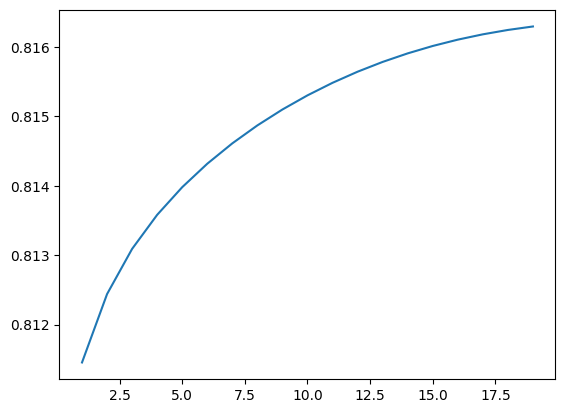

In [35]:
err = []
for i in range(1,20):
    s2 = Ridge(alpha=i)
    pipe = Pipeline([('step1',s1), ('step2', s2)])

    pipe.fit(x_train, y_train)

    y_pred = pipe.predict(x_test)

    err.append(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.plot(range(1,20), err)

In [36]:
s2 = Ridge(alpha=19)
pipe = Pipeline([('step1',s1), ('step2', s2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

R2 : 0.8162932819663427
MSE : 0.07027721068447583
MAE : 0.20600707033572938


Optimal alpha: 0.0001


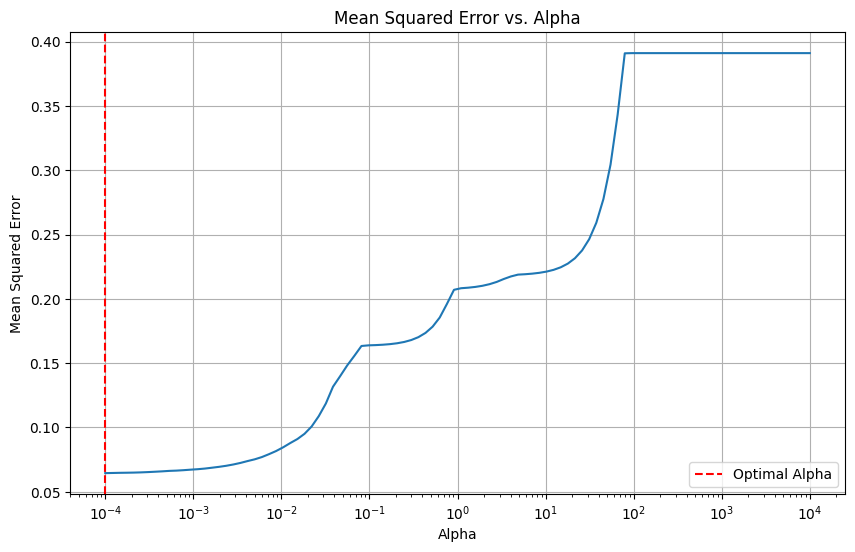

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
step2 = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
pipe = Pipeline([('step1',s1), ('step2', step2)])
pipe.fit(x_train, y_train)
optimal_alpha = pipe.named_steps['step2'].alpha_
print("Optimal alpha:", optimal_alpha)

# Plot the mean cross-validation error for each alpha value
plt.figure(figsize=(10, 6))
plt.plot(pipe.named_steps['step2'].alphas_, np.mean(pipe.named_steps['step2'].mse_path_, axis=1))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha')
plt.axvline(optimal_alpha, color='r', linestyle='--', label='Optimal Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
x_train.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touch,IPS,ppi,CPU Brand,Clock Speed,ssd,hybrid,OS
183,Toshiba,Notebook,8,Intel,Windows 10,2.00,0,0,100.45,Intel Core i5,2.5,128,0,Windows
1141,MSI,Gaming,8,Nvidia,Windows 10,2.40,0,0,141.21,Intel Core i7,2.8,128,0,Windows
1049,Asus,Netbook,4,Intel,Chrome OS,1.20,0,0,135.09,Other Intel Processor,1.6,0,0,others
1020,Dell,2 in 1 Convertible,4,Intel,Windows 10,2.08,1,1,141.21,Intel Core i3,2.3,0,0,Windows
878,Dell,Notebook,4,Nvidia,Windows 10,2.18,0,0,141.21,Intel Core i5,2.5,128,0,Windows


In [38]:
s2 = Lasso(alpha=0.0001)
pipe = Pipeline([('step1',s1), ('step2', s2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

R2 : 0.8102338999322409
MSE : 0.07259523406645298
MAE : 0.204211892784312


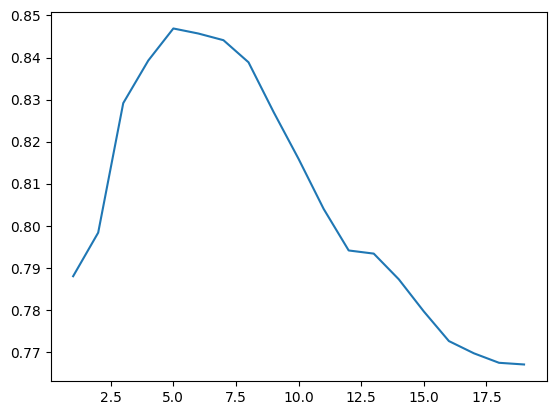

In [39]:
err = []
for i in range(1,20):
    s2 = KNeighborsRegressor(n_neighbors= i)
    pipe = Pipeline([('step1',s1), ('step2', s2)])

    pipe.fit(x_train, y_train)

    y_pred = pipe.predict(x_test)

    err.append(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.plot(range(1,20), err)


In [40]:
s2 = KNeighborsRegressor(n_neighbors= 5)
pipe = Pipeline([('step1',s1), ('step2', s2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')


R2 : 0.8469080678144043
MSE : 0.058565490078209534
MAE : 0.1891559100553951


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
x_train_1 = s1.fit_transform(x_train)

In [670]:
x_train_1

array([[0.0, 0.0, 0.0, ..., 2.5, 128, 0],
       [0.0, 0.0, 0.0, ..., 2.8, 128, 0],
       [0.0, 1.0, 0.0, ..., 1.6, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 2.5, 0, 0],
       [0.0, 0.0, 0.0, ..., 2.3042728019720626, 0, 0],
       [1.0, 0.0, 0.0, ..., 1.1, 0, 0]], dtype=object)

In [43]:
s1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['Company','TypeName','Gpu','OpSys','CPU Brand','OS'])], remainder='passthrough')

s2 = DecisionTreeRegressor(random_state=42)
pipe = Pipeline([('step1',s1), ('step2', s2)])
param_grid = {
    'step2__max_features': [None, 'sqrt', 'log2'],  # Updated to include valid options
    'step2__ccp_alpha': [0.1, 0.01, 0.001],
    'step2__max_depth': [5, 6, 7, 8, 9]
}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prave\AppData\Local\Programs\Python\

Best parameters: {'step2__ccp_alpha': 0.1, 'step2__max_depth': 5, 'step2__max_features': None}
R2 : 0.54574837168728
MSE : 0.17377446904718236
MAE : 0.3361727322859707


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [45]:
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth': [5, 6, 7, 8, 9]
}

grid_search = GridSearchCV(dt, param_grid, cv=5)

grid_search.fit(x_train_1, y_train)

grid_search.best_score_

print("Best parameters:", grid_search.best_params_, grid_search.best_score_)

Best parameters: {'ccp_alpha': 0.001, 'max_depth': 9, 'max_features': 'sqrt'} 0.7253692542154521


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

In [46]:
s2 = DecisionTreeRegressor(**grid_search.best_params_)
pipe = Pipeline([('step1',s1), ('step2', s2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

R2 : 0.7099401266852579
MSE : 0.11096272932336528
MAE : 0.2688458262658419


In [47]:
from sklearn.svm import SVR

s2 = SVR(kernel='rbf', C=10000, epsilon=0.1)
pipe = Pipeline([('step1',s1), ('step2', s2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

R2 : 0.8563931143665618
MSE : 0.054936974899053664
MAE : 0.1806451404776361


In [49]:
x_test_1 = s1.transform(x_test)

In [54]:
import xgboost as xgb

s2 = xgb.XGBRegressor()

# Define hyperparameters grid
param_grid = {
    's2__n_estimators': [50, 100, 200],
    's2__learning_rate': [0.01, 0.05, 0.1],
    's2__max_depth': [3, 5, 7],
    's2__min_child_weight': [1, 3, 5],
    's2__gamma': [0.0, 0.1, 0.2],
    's2__subsample': [0.6, 0.8, 1.0],
    's2__colsample_bytree': [0.6, 0.8, 1.0]
}

pipe = Pipeline([('step1',s1), ('step2', s2)])


# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test_1)

# Evaluate the model
print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

ValueError: Invalid parameter 's2' for estimator Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Gpu',
                                                   'OpSys', 'CPU Brand',
                                                   'OS'])])),
                ('step2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_st...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [91]:
import pickle

pickle.dump(df.drop(columns='OpSys'),open(r"C:\Users\prave\Desktop\Price Predict\.venv\df.pkl",'wb'))

In [53]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch,IPS,ppi,CPU Brand,Clock Speed,ssd,hybrid,OS
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,128,0,MAC
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,MAC
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,256,0,others
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,512,0,MAC
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,256,0,MAC


In [76]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_pipe = Pipeline(steps=[('Impute_Mean', SimpleImputer(missing_values=np.nan, strategy='mean')), ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputation_constant', SimpleImputer(fill_value='missing', strategy='')),('OneHot', OneHotEncoder(handle_unknown='ignore')) ])

In [74]:
pre_processor = ColumnTransformer([('cat', cat_pipe, ['Company', 'TypeName','Gpu', 'CPU Brand','OS']), ('numeric', numeric_pipe,['Ram',  'Weight', 'Touch', 'IPS', 'ppi','Clock Speed', 'ssd', 'hybrid'])])

In [ ]:
s2 = XGBRegressor()
pipe = make_pipeline(pre_processor, s2)

In [89]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV  # Added import
from xgboost import XGBRegressor  # Assuming you are using XGBoost
from sklearn.tree import DecisionTreeRegressor

# Your pipelines and preprocessor definition
numeric_pipe = Pipeline(steps=[('Impute_Mean', SimpleImputer(missing_values=np.nan, strategy='mean')), ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=[('imputation_constant', SimpleImputer(fill_value='missing', strategy='constant')),('OneHot', OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop='first')) ])
pre_processor = ColumnTransformer([('cat', cat_pipe, ['Company', 'TypeName','Gpu', 'CPU Brand','OS']), ('numeric', numeric_pipe,['Ram',  'Weight', 'Touch', 'IPS', 'ppi','Clock Speed', 'ssd', 'hybrid'])])

# Pipeline with preprocessor and model
s2 = DecisionTreeRegressor(random_state=42)
pipe = make_pipeline(pre_processor, s2)
param_grid = {
    'decisiontreeregressor__max_features': [None, 'sqrt', 'log2'],  # Updated to include valid options
    'decisiontreeregressor__ccp_alpha': [0.1, 0.01, 0.001],
    'decisiontreeregressor__max_depth': [5, 6, 7, 8, 9]
}

# GridSearchCV object
grid = GridSearchCV(pipe, cv=5, param_grid=param_grid, n_jobs=1)
grid.fit(x_train, y_train)

# Get the best model
best_model = grid.best_estimator_

#Predict using the best model
y_pred = best_model.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')


R2 : 0.8227172426221526
MSE : 0.06781971734253704
MAE : 0.20195045114310164


In [ ]:
s1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['Company','TypeName','Gpu','OpSys','CPU Brand','OS'])], remainder='passthrough')

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV  # Added import
from xgboost import XGBRegressor  # Assuming you are using XGBoost

# Your pipelines and preprocessor definition
numeric_pipe = Pipeline(steps=[('Impute_Mean', SimpleImputer(missing_values=np.nan, strategy='mean')), ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=[('imputation_constant', SimpleImputer(fill_value='missing', strategy='constant')),('OneHot', OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop='first')) ])
pre_processor = ColumnTransformer([('cat', cat_pipe, ['Company', 'TypeName','Gpu', 'CPU Brand','OS']), ('numeric', numeric_pipe,['Ram',  'Weight', 'Touch', 'IPS', 'ppi','Clock Speed', 'ssd', 'hybrid'])])

# Pipeline with preprocessor and model
s2 = XGBRegressor()
pipe = make_pipeline(pre_processor, s2)

# Define parameter grid for GridSearchCV
param_grid = {
    'xgbregressor__n_estimators': [100, 200, 300],  # Adjusted prefix to match the model name
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__max_depth': [4, 6, 8],
    'xgbregressor__min_child_weight': [1, 2, 3],
    'xgbregressor__gamma': [0.0, 0.2, 0.4],
    'xgbregressor__subsample': [0.7, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.7, 0.9, 1.0]
}

# GridSearchCV object
grid = GridSearchCV(pipe, cv=5, param_grid=param_grid, n_jobs=1, verbose=1)
grid.fit(x_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Predict using the best model
y_pred = best_model.predict(x_test)

print(f'R2 : {r2_score(y_test, y_pred)}\nMSE : {mean_squared_error(y_test, y_pred)}\nMAE : {mean_absolute_error(y_test, y_pred)}')


In [92]:
x_train.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'Weight', 'Touch', 'IPS', 'ppi',
       'CPU Brand', 'Clock Speed', 'ssd', 'hybrid', 'OS'],
      dtype='object')